# Useful Packages in Python

* Basics of Pandas, Matplotlib, Scikit


* Explore simple debugging in Python

## Pandas

Pandas is used for data maniplution and analysis. It is build on the NumPy package and provides an important data structure 'DataFrame'. The DataFrame has rows and columns, similar to a table, where the Pandas can basically read data (from sources such as a CSV file) and fill up the rows and columns. This will be easier to work with than through the use of loops and list/dictionary in Python.

You will work on this more in the module on Data Science

In [3]:
import pandas as pd

dict = {"student": ["John", "Rosie", "Ah Hock", "Siti", "Bala"],
       "age": [18, 21, 19, 18, 20],
       "town": ["Ang Mo Kio", "Yishun", "Toa Payoh", "Clementi", "Tampines"],
       "grade": [2.4, 3.4, 2.7, 3.7, 3.2] }

class_grades = pd.DataFrame(dict)
print(class_grades)

   student  age        town  grade
0     John   18  Ang Mo Kio    2.4
1    Rosie   21      Yishun    3.4
2  Ah Hock   19   Toa Payoh    2.7
3     Siti   18    Clementi    3.7
4     Bala   20    Tampines    3.2


The index are automatically given numbers from 0 to 4. These can be changed as follows

In [4]:
class_grades.index = ["JN", "RS", "AH", "ST", "BL"]

print(class_grades)

    student  age        town  grade
JN     John   18  Ang Mo Kio    2.4
RS    Rosie   21      Yishun    3.4
AH  Ah Hock   19   Toa Payoh    2.7
ST     Siti   18    Clementi    3.7
BL     Bala   20    Tampines    3.2


Accessing the values (list of students) within the dataframe. A list of students is essentially the series or column in the DataFrame

In [5]:
class_grades['student']

JN       John
RS      Rosie
AH    Ah Hock
ST       Siti
BL       Bala
Name: student, dtype: object

Accessing via a single bracket will output a Pandas Series, while in the following example using a double bracket will output a DataFrame

In [6]:
class_grades[['student']]

,student
JN,John
RS,Rosie
AH,Ah Hock
ST,Siti
BL,Bala


To access more series, simply add in the respective series you are interested in.

In [7]:
class_grades[['student','town']]

,student,town
JN,John,Ang Mo Kio
RS,Rosie,Yishun
AH,Ah Hock,Toa Payoh
ST,Siti,Clementi
BL,Bala,Tampines


loc and iloc can also be used to perform data selection operation. 

* loc is label-based. It requires the use of row and column labels.
* iloc is integer-based. It requires the index of the row and column.

In [8]:
class_grades.loc[['JN','AH']]

,student,age,town,grade
JN,John,18,Ang Mo Kio,2.4
AH,Ah Hock,19,Toa Payoh,2.7


In [9]:
class_grades.loc[['JN','AH'],['age','grade']]

,age,grade
JN,18,2.4
AH,19,2.7


In [10]:
class_grades.iloc[[1,3]]

,student,age,town,grade
RS,Rosie,21,Yishun,3.4
ST,Siti,18,Clementi,3.7


In [11]:
class_grades.iloc[[4],[0,1,3]]

,student,age,grade
BL,Bala,20,3.2


### Reading data from csv files 

Pandas made it easier to read in data from a number of files formats. The HDB median resale prices are publicly available from data.gov.sg. https://data.gov.sg/dataset/median-resale-prices-for-registered-applications-by-town-and-flat-type?resource_id=a5ddfc4d-0e43-4bfe-8f51-e504e1365e27

Explore using the square brackets to access specific rows via Pandas DataFrame.

\[Starting index: Stop index]

In [1]:
import pandas as pd

resalePrices = pd.read_csv('HDB media resale prices.csv')

resalePrices[2:4]

,quarter,town,flat_type,price
2,2007-Q2,Ang Mo Kio,3-room,172000
3,2007-Q2,Ang Mo Kio,4-room,260000


To understand a little more about the data being read, some data clean up will be done to extract transactions with valid prices.

In [2]:
#select records that do not have "NA" or "-" as the price
df = resalePrices[(resalePrices.price.str.lower() != "na") & (resalePrices.price.str.lower() != "-") ].copy()

#you can use df.isnull().sum() to check the number of NaN values. However the next line simply drops the records with NaN price
df = df.dropna()

#reset the index of the dataframe
df = df.reset_index(drop=True)

#changes the price to a numeric value
df.price = pd.to_numeric(df.price)

#changes the town name to all uppercase
df.town= df.town.str.upper()
df.town= df.town.replace(['CENTRAL AREA'], 'CENTRAL')

#changes the town name to all uppercase
df.flat_type= df.flat_type.str.lower()
#change all "exec" to "executive"
df.flat_type= df.flat_type.replace(['exec'],'executive')

#Display statistics for the data
df.describe(include='all')

,quarter,town,flat_type,price
count,3580,3580,3580,3580.000000
unique,51,25,5,NaN
top,2009-Q3,JURONG WEST,4-room,NaN
freq,85,204,1187,NaN
mean,NaN,NaN,NaN,431292.835196
std,NaN,NaN,NaN,131718.475579
min,NaN,NaN,NaN,136000.000000
25%,NaN,NaN,NaN,332000.000000
50%,NaN,NaN,NaN,415950.000000
75%,NaN,NaN,NaN,515000.000000


#### More about Matplotlib

Matplotlib is a power plotting library that can help to visualize our data. In this section
* the number of flat transacted per flat type is displayed in a bar plot
* the prices are grouped into the different quarters and the mean is displayed in a line plot.

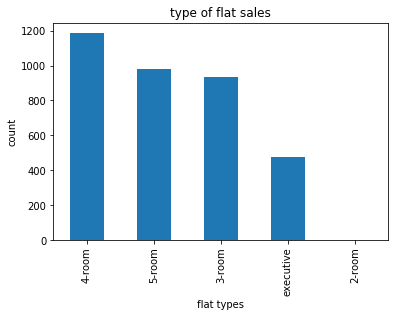

In [3]:
import matplotlib.pyplot as plt

df['flat_type'].value_counts().plot(kind='bar')
plt.title('type of flat sales')
plt.xlabel('flat types')
plt.ylabel('count')
plt.show()

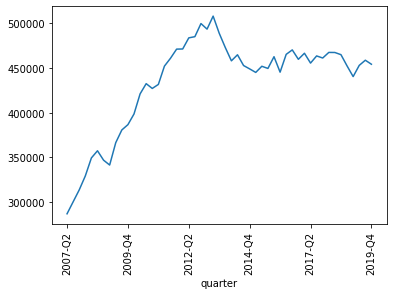

In [4]:
avg_price = df.groupby('quarter')['price'].agg('mean')
avg_price.plot()
plt.xticks(rotation='vertical')
plt.show()

##### Using plt.subplots()

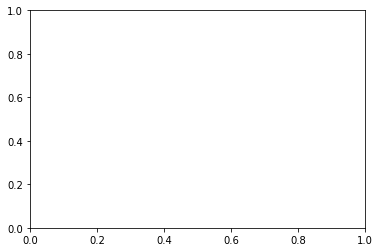

In [5]:
#default call is subplots(nrows=1, ncols=1)
fig, ax = plt.subplots()

#### More about Seaborn

Seaborn is also data visualization library based on matplotlib. It provides a high level interface for drawing attractive statistical graphics.

In [10]:
pip install seaborn --upgrade

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1
Note: you may need to restart the kernel to use updated packages.


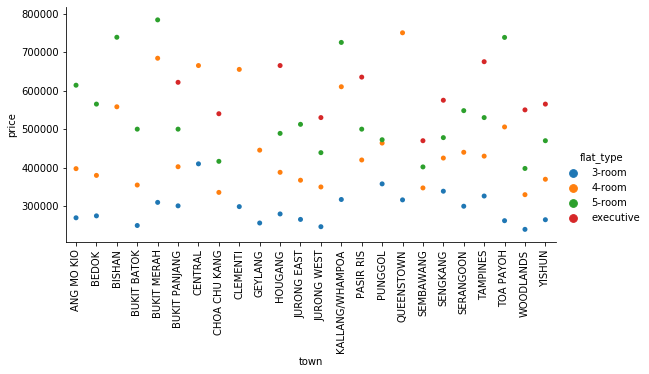

In [7]:
import seaborn as sns
# seaborn version 0.11
# Need to restart kernal when changing seaborn version
# require use of catplot for relations between numerical and one or more categorical variables
af = df[df.quarter == "2019-Q4"].copy()

chart =sns.catplot(x='town', y='price', data=af, jitter = False, hue='flat_type', height=4, aspect=2)
chart.set_xticklabels(rotation='vertical')
plt.show()

In [ ]:
pip uninstall seaborn

In [18]:
pip install seaborn==0.10.1

  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
Note: you may need to restart the kernel to use updated packages.


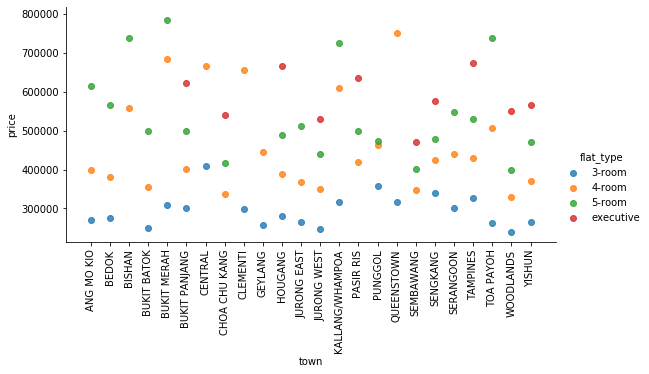

In [9]:
import seaborn as sns

#seaborn version 0.10. or less
af = df[df.quarter == "2019-Q4"].copy()

chart =sns.lmplot(x='town', y='price', data=af,fit_reg=False, hue='flat_type', height=4, aspect=2)
chart.set_xticklabels(rotation='vertical')
plt.show()

In [1]:
import seaborn as sns
sns.__version__


'0.10.1'

## Scikit-learn

Scikit-learn provides a number of standard datasets, such as the iris and digits datasets for classification and the boston house price dataset for regression. Look for more details on Machine Learning in the other modules.

In the following example, data is loaded and partition for both training and testing

Prediction: [9]


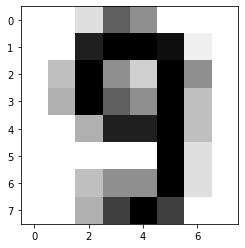

In [17]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

#load the data provided by scikit-learn
digits = datasets.load_digits()
#print(digits.data)

clf = svm.SVC(gamma=0.001, C=100)
#print(len(digits.data))

#train the data. Leave out the last 10 for testing
x,y = digits.data[:-10],digits.target[:-10]
clf.fit(x,y)

print('Prediction:', clf.predict([digits.data[-2]]))
plt.imshow(digits.images[-2], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()


## Exercise

1. Load the csv file (number-of-rain-days.csv) containing details on the number of rainy days in a month

2. Determine if there is any missing values in the data

3. Select only records from 2019-01 till now

4. Display the extracted records as a line graph and set the x label to be month

# Debugging in Python

Trying to figure out what is wrong with the code or trying to understand how the code works is an important skill. To debug in Jupyter notebook, you use Python's own pdb module

In [23]:
def bad_function(var):
    return var + 0
bad_function("input")

TypeError: can only concatenate str (not "int") to str

The above error indicates a string cannot be concatenated with an integer.
For Python 3.7, use the breakpoint() to debug the code.

* a(rgs) - print the args of the current function (f(args))
* l(ist) - show where in the source code that the next line to execute is 
* w(here) – Print the stack trace
* d(own) – Move the current frame X number of levels down. Defaults to one.
* u(p) – Move the current frame X number of levels up. Defaults to one.
* b(reak) – With a *lineno* argument, set a break point at that line number in the current file / context
* **c(ontinue)** – Continue execution, only stop when a breakpoint is reached
* **n(ext)** - Execute the next line in the current function is reached, or it returns
* **s(tep)** - Execute the current line, stop at te first possible occasion (either in a function that is called or on the next line in the current function
* r(eturn) - Continue until the current functino returns
* **q(uit)** - Exit from the debugging session
* ? - all documented commands

The difference between next and step is that step stops inside a called function, while next executes called functions at (nearly) full speed, only stopping at the next line in the current function.

In [25]:
def bad_function(var):
    #import pdb
    #pdb.set_trace()
    breakpoint()
    return var + 0
bad_function("input")

> <ipython-input-25-fe30321b12c6>(5)bad_function()
-> return var + 0


(Pdb)  q


BdbQuit: 

### Exercise: 
    
Remove the commented breakpoint and try to debug through the steps in the following code 

In [26]:
def f():
    #breakpoint()

    for temp in range(4):
        if (temp <2):
            x = temp
        else:
            x = -1
            
x = 0
f()

Code development and data analysis always require a bit of trial and error, and IPython contains tools to streamline this process.
This section will briefly cover some options for controlling Python's exception reporting, followed by exploring tools for debugging errors in code.

## Controlling Exceptions: ``%xmode``

Most of the time when a Python script fails, it will raise an Exception.
When the interpreter hits one of these exceptions, information about the cause of the error can be found in the *traceback*, which can be accessed from within Python.
With the ``%xmode`` magic function, IPython allows you to control the amount of information printed when the exception is raised.
Consider the following code:

In [27]:
def func1(a, b):
    return a / b

def func2(x):
    a = x
    b = x - 1
    return func1(a, b)

In [28]:
func2(1)

ZeroDivisionError: division by zero

Calling ``func2`` results in an error, and reading the printed trace lets us see exactly what happened.
By default, this trace includes several lines showing the context of each step that led to the error.
Using the ``%xmode`` magic function (short for *Exception mode*), we can change what information is printed.

``%xmode`` takes a single argument, the mode, and there are three possibilities: ``Plain``, ``Context``, and ``Verbose``.
The default is ``Context``, and gives output like that just shown before.
``Plain`` is more compact and gives less information:

In [29]:
%xmode Plain

Exception reporting mode: Plain


In [30]:
func2(1)

ZeroDivisionError: division by zero

The ``Verbose`` mode adds some extra information, including the arguments to any functions that are called:

In [31]:
%xmode Verbose

Exception reporting mode: Verbose


In [32]:
func2(1)

ZeroDivisionError: division by zero

This extra information can help narrow-in on why the exception is being raised.
So why not use the ``Verbose`` mode all the time?
As code gets complicated, this kind of traceback can get extremely long.
Depending on the context, sometimes the brevity of ``Default`` mode is easier to work with.

## Debugging: When Reading Tracebacks Is Not Enough

The standard Python tool for interactive debugging is ``pdb``, the Python debugger.
This debugger lets the user step through the code line by line in order to see what might be causing a more difficult error.
The IPython-enhanced version of this is ``ipdb``, the IPython debugger.

There are many ways to launch and use both these debuggers; we won't cover them fully here.
Refer to the online documentation of these two utilities to learn more.

In IPython, perhaps the most convenient interface to debugging is the ``%debug`` magic command.
If you call it after hitting an exception, it will automatically open an interactive debugging prompt at the point of the exception.
The ``ipdb`` prompt lets you explore the current state of the stack, explore the available variables, and even run Python commands!

Let's look at the most recent exception, then do some basic tasks–print the values of ``a`` and ``b``, and type ``quit`` to quit the debugging session:

In [35]:
%debug

> <ipython-input-27-586ccabd0db3>(2)func1()
      1 def func1(a, b):
----> 2     return a / b
      3 
      4 def func2(x):
      5     a = x



ipdb>  q


The interactive debugger allows much more than this, though–we can even step up and down through the stack and explore the values of variables there:

In [36]:
%debug

> <ipython-input-27-586ccabd0db3>(2)func1()
      1 def func1(a, b):
----> 2     return a / b
      3 
      4 def func2(x):
      5     a = x



ipdb>  q


This allows you to quickly find out not only what caused the error, but what function calls led up to the error.

If you'd like the debugger to launch automatically whenever an exception is raised, you can use the ``%pdb`` magic function to turn on this automatic behavior:

In [ ]:
%xmode Plain
%pdb on
func2(1)

Finally, if you have a script that you'd like to run from the beginning in interactive mode, you can run it with the command ``%run -d``, and use the ``next`` command to step through the lines of code interactively.

### Partial list of debugging commands

There are many more available commands for interactive debugging than we've listed here; the following table contains a description of some of the more common and useful ones. You can see that they are similar to the options in Python's pdb module:

| Command         |  Description                                                |
|-----------------|-------------------------------------------------------------|
| ``list``        | Show the current location in the file                       |
| ``h(elp)``      | Show a list of commands, or find help on a specific command |
| ``q(uit)``      | Quit the debugger and the program                           |
| ``c(ontinue)``  | Quit the debugger, continue in the program                  |
| ``n(ext)``      | Go to the next step of the program                          |
| ``<enter>``     | Repeat the previous command                                 |
| ``p(rint)``     | Print variables                                             |
| ``s(tep)``      | Step into a subroutine                                      |
| ``r(eturn)``    | Return out of a subroutine                                  |

For more information, use the ``help`` command in the debugger, or take a look at ``ipdb``'s [online documentation](https://github.com/gotcha/ipdb).